In [3]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from bing_image_downloader import downloader

In [26]:
#downloader.download('grizzly bear', limit=150,  output_dir='./bears', adult_filter_off=True, force_replace=False, timeout=60)
#downloader.download('black bear', limit=150,  output_dir='./bears', adult_filter_off=True, force_replace=False, timeout=60)
#downloader.download('teddy bear', limit=150,  output_dir='./bears', adult_filter_off=True, force_replace=False, timeout=60)

In [27]:
path = Path('./bears')
fns = get_image_files(path)
fns

(#450) [Path('bears/black/Image_145.jpg'),Path('bears/black/Image_25.jpg'),Path('bears/black/Image_15.jpg'),Path('bears/black/Image_41.jpg'),Path('bears/black/Image_98.jpg'),Path('bears/black/Image_89.jpg'),Path('bears/black/Image_26.jpg'),Path('bears/black/Image_101.jpg'),Path('bears/black/Image_97.jpg'),Path('bears/black/Image_143.jpg')...]

In [28]:
failed = verify_images(fns)
failed.map(Path.unlink);

In [29]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [30]:
dls = bears.dataloaders(path)

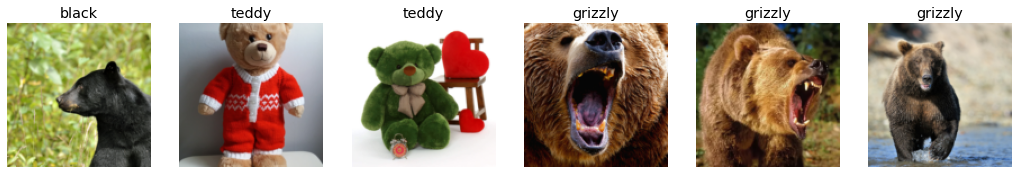

In [31]:
dls.valid.show_batch(max_n=6, nrows=1)

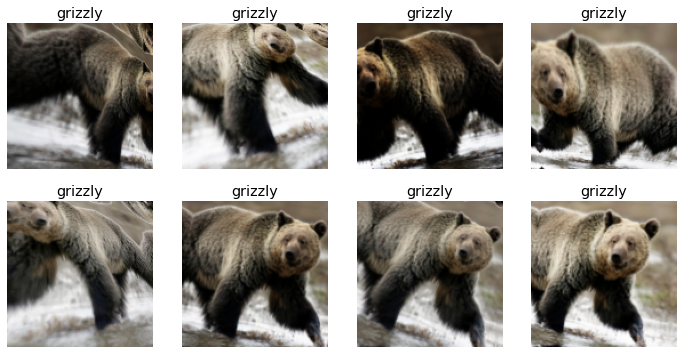

In [32]:
# data augamentation
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [43]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [44]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.235047,0.156405,0.067416,00:07


/home/jworkman/miniconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.168008,0.032417,0.011236,00:08
1,0.106652,0.008229,0.000000,00:08
2,0.080842,0.005064,0.000000,00:08
3,0.066228,0.006408,0.000000,00:08


/home/jworkman/miniconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/jworkman/miniconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/jworkman/miniconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/jworkman/miniconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


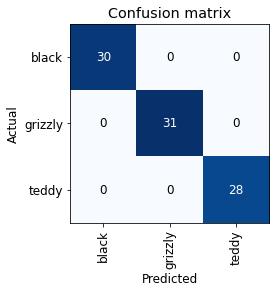

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

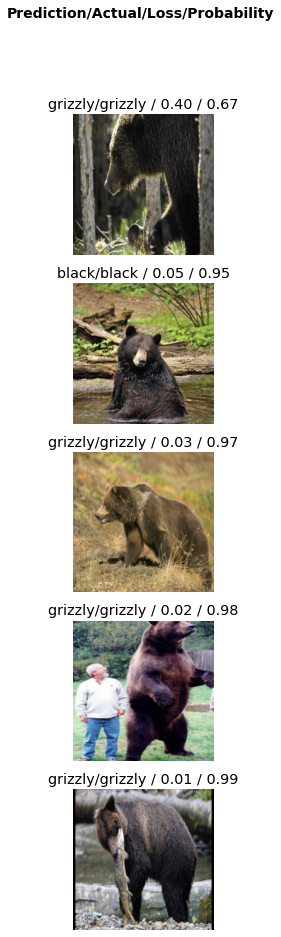

In [48]:
interp.plot_top_losses(5, nrows=5)

In [49]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/jworkman/miniconda3/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [50]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [55]:
learn.export()

In [60]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [62]:
learn_inf = load_learner(path/'export.pkl')

In [105]:
btn_upload = widgets.FileUpload()
#btn_run = widgets.Button(description='Classify')

In [106]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [107]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])